# Random Forests
Applied to the diabetes dataset (used for Lesson 1: Decision Trees)

### Importing Modules

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

# importing Scikit-learn library and datasets package
from sklearn.datasets import load_diabetes, load_iris

# importing decision tree from tree module
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# importing random forest classifier from ensemble module
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# using metrics module for accuracy calculation
from sklearn.metrics import accuracy_score

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the diabetes dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The dataframe has no null values, and all are numerical columns. There are no categorical columns, so no encoding required.

## Features and target

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X.shape

feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Train Test Split

In [ ]:
#random state
r = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=r) # 70% training and 30% test

In [ ]:
# Create Random Forest Classifie
r = 42
rf = RandomForestClassifier(random_state=r)

# Train the RF classifier
rf.fit(X_train,y_train)

#Predict the response for test dataset for the models
y_test_pred_rf = rf.predict(X_test)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')

Testing Accuracy for Random Forest model: 0.7532467532467533


## Importance scores: Feature Importance

A property of the Random Forest ensemble method in sklearn is that they let you print importance scores for features in the dataset.

### 1. Gini Importance and visualisation

In [ ]:
#Finding the important features using the built-in Gini importance
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
1,Glucose,0.282089
5,BMI,0.158120
7,Age,0.142116
6,DiabetesPedigreeFunction,0.113127
2,BloodPressure,0.084052
0,Pregnancies,0.080552
3,SkinThickness,0.070559
4,Insulin,0.069385


Text(0, 0.5, 'Features')

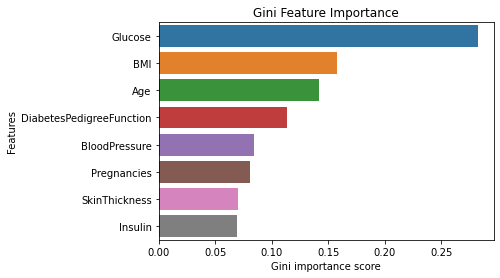

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_imp_df['Gini Importance'],y=feature_imp_df['Feature'],data=feature_imp_df)
plt.title("Gini Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")


Accuracy after dropping least important feature according to Gini importance

In [ ]:
# drop the least important feature from X_train and X_test
X_train_gini = X_train.drop(['Insulin'], axis=1)
X_test_gini = X_test.drop(['Insulin'], axis=1)

# Create Random Forest Classifier

r = 42
rf_gini = RandomForestClassifier(random_state=r)
rf_gini.fit(X_train_gini,y_train)

#Predict the response for test dataset for the models
y_test_pred_rf_gini = rf_gini.predict(X_test_gini)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with Gini importance: {accuracy_score(y_test, y_test_pred_rf_gini)}')

Testing Accuracy for Random Forest model: 0.7532467532467533
Testing Accuracy for Random Forest model with Gini importance: 0.7575757575757576


### 2. Permutation feature importance and visualisation

In [ ]:
# Permutation feature importance
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)
perm_imp_df = pd.DataFrame({'Feature': feature_names, 'Permutation Importance': result.importances_mean}).sort_values('Permutation Importance', ascending=False)
perm_imp_df

,Feature,Permutation Importance
1,Glucose,0.119481
7,Age,0.034199
5,BMI,0.023810
4,Insulin,0.022511
6,DiabetesPedigreeFunction,0.011688
2,BloodPressure,0.008225
0,Pregnancies,0.005628
3,SkinThickness,-0.009524


Text(0, 0.5, 'Features')

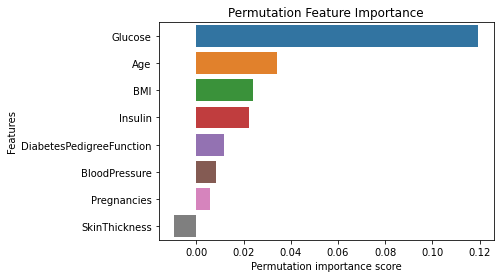

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=perm_imp_df['Permutation Importance'],y=perm_imp_df['Feature'],data=perm_imp_df)
plt.title("Permutation Feature Importance")
plt.xlabel("Permutation importance score")
plt.ylabel("Features")

Accuracy after dropping least important feature according to Permutation importance

In [ ]:
# drop the least important feature from X_train and X_test
X_train_perm = X_train.drop(['SkinThickness'], axis=1)
X_test_perm = X_test.drop(['SkinThickness'], axis=1)

# Create Random Forest Classifier

r = 42
rf_perm = RandomForestClassifier(random_state=r)
rf_perm.fit(X_train_perm,y_train)

#Predict the response for test dataset for the models
y_test_pred_rf_perm = rf_perm.predict(X_test_perm)

print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with permutation importance: {accuracy_score(y_test, y_test_pred_rf_perm)}')

Testing Accuracy for Random Forest model: 0.7532467532467533
Testing Accuracy for Random Forest model with permutation importance: 0.7575757575757576


An advantage of investigating the importance of features is that irrelevant features can be removed. This removal of noise tends to improve performance and reduce training time.

In [ ]:
#drop the least important feature from X_train and X_test
X_train = X_train.drop(['SkinThickness'], axis=1)
X_test = X_test.drop(['SkinThickness'], axis=1)

## Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning for Random Forest using GridSearchCV and fit the data.
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
#Check best score hyperparameters
print(grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

0.7820619126589275


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=42)

Visualise as Tree plot

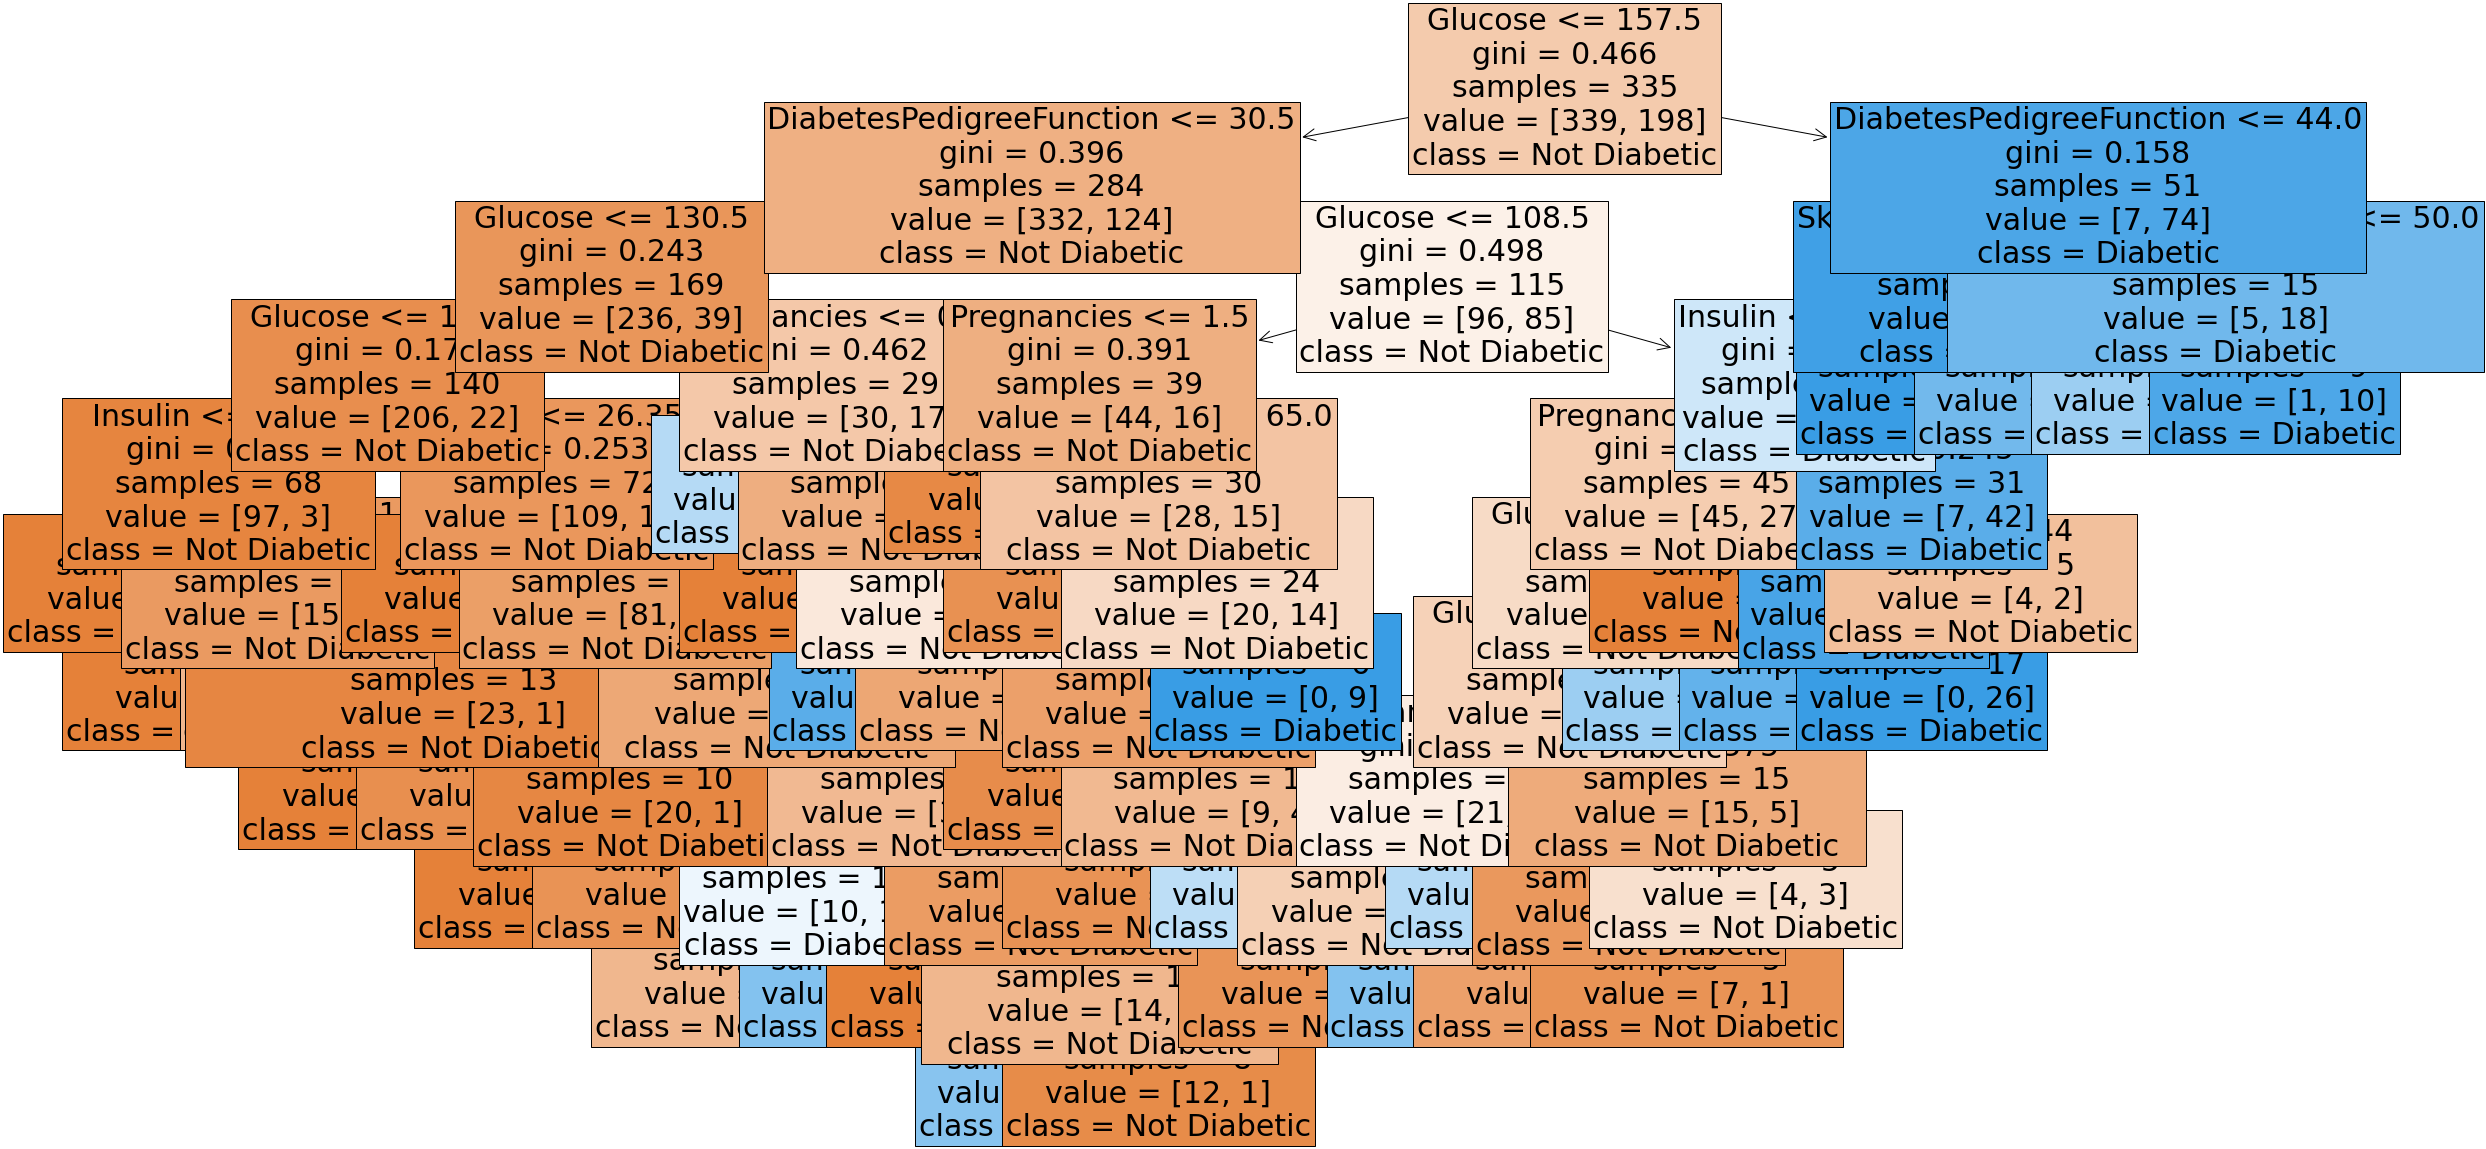

In [ ]:
#Plot one tree, e.g. Tree 3
plt.figure(figsize=(40,20))
plot_tree(rf_best.estimators_[3], feature_names = X.columns,class_names=['Not Diabetic', 'Diabetic'],filled=True,fontsize=30)
plt.show()

### Comparing models

In [ ]:
# Create base model which is a Decision Tree classifer object, training a model without pruning
#The next one is an ensemble model, BaggingClassifier
#Then we use the Random Forest Classifier, with and without hyperparameters
r = 42
base = DecisionTreeClassifier(max_depth=None,random_state=r)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=r)
rf = RandomForestClassifier(random_state=r)
rf_hp = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=120, random_state=r)

# Train the  classifiers
base.fit(X_train,y_train)
ensemble.fit(X_train,y_train)
rf.fit(X_train,y_train)
rf_hp.fit(X_train,y_train)

#Predict the response for test dataset for the models
y_test_pred_base = base.predict(X_test)
y_test_pred_ensemble = ensemble.predict(X_test)
y_test_pred_rf = rf.predict(X_test)
y_test_pred_rf_hp = rf_hp.predict(X_test)

print(f'Testing Accuracy for base Decision Tree model: {accuracy_score(y_test, y_test_pred_base)}')
print(f'Testing Accuracy for ensemble Bagging model: {accuracy_score(y_test, y_test_pred_ensemble)}')
print(f'Testing Accuracy for Random Forest model: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Testing Accuracy for Random Forest model with hyperparameters: {accuracy_score(y_test, y_test_pred_rf_hp)}')

Testing Accuracy for base Decision Tree model: 0.696969696969697
Testing Accuracy for ensemble Bagging model: 0.7359307359307359
Testing Accuracy for Random Forest model: 0.7575757575757576
Testing Accuracy for Random Forest model with hyperparameters: 0.7878787878787878
